In [1]:
test_results = '/home/art/Documents/data/RAM_output/RAM_results_190219_210401/test_results_190227_171037/replicate_1'

In [47]:
%matplotlib inline
import os

import matplotlib as mpl
from matplotlib import style
import matplotlib.pyplot as plt
style.use('dark_background')
import numpy as np

def discrete_cmap(N=6, base_cmap='Greens'):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N+1))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)

fixation_cmap = discrete_cmap()

In [3]:
# get data
fix_path = os.path.join(test_results, 'examples', 'fixations_epoch_test.npy')
fix = np.load(fix_path)

images_path = os.path.join(test_results, 'examples', 'images_epoch_test.npy')
images = np.load(images_path)

In [4]:
true_lbl_path = os.path.join(test_results, 'true_lbl.npy')
true_lbl = np.load(true_lbl_path)

num_examples = fix.shape[0]
true_lbl = true_lbl[:num_examples]

In [5]:
fixes_by_digit = {}
digits = range(10)
for digit in digits:
    digit_inds = np.where(true_lbl == digit)[0]
    fixes_by_digit[digit] = fix[digit_inds]

In [66]:
ind

(0, (13.188235294117646, 20.6))

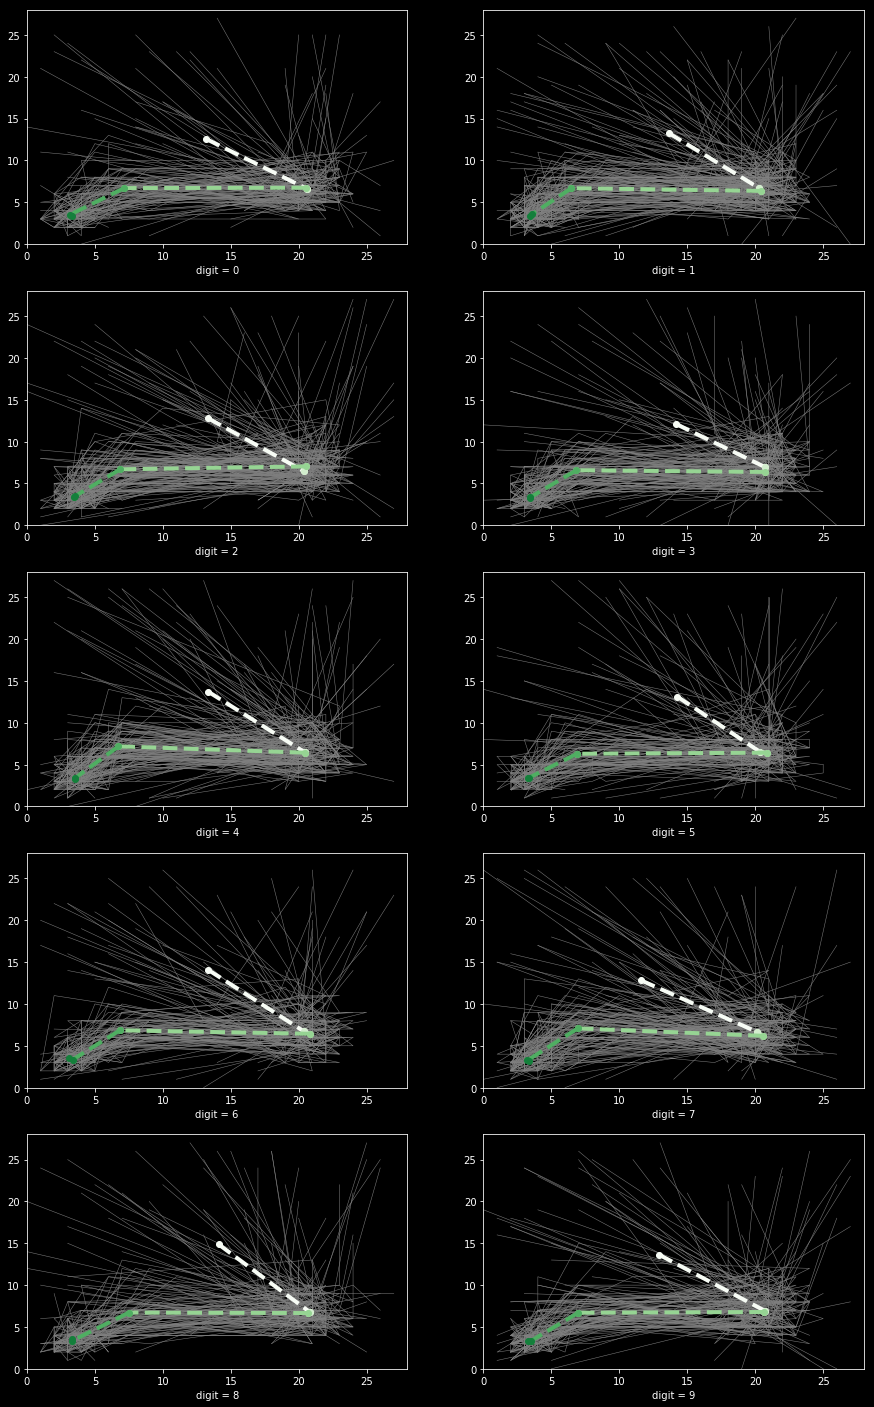

In [74]:
fig, ax = plt.subplots(5, 2)
fig.set_size_inches(15,25)
ax = ax.ravel()

for digit in digits:
    fixes_this_digit = fixes_by_digit[digit]
    xx = fixes_this_digit[:,:,0]
    yy = fixes_this_digit[:,:,1]
    for x, y in zip(xx, yy):
        ax[digit].plot(x, y, color='gray', linewidth=0.5)
    xmean = xx.mean(axis=0)
    ymean = yy.mean(axis=0)
    xy = np.stack([xmean, ymean], axis=1)
    for ind, (start, stop) in enumerate(zip(xy[:-1], xy[1:])):
        x, y = zip(start, stop)
        ax[digit].plot(x, y, color=fixation_cmap(ind), 
                       linewidth=4, linestyle='--', marker='o')
    ax[digit].set_xlim([0, 28])
    ax[digit].set_ylim([0, 28])
    ax[digit].set_xlabel(f'digit = {digit}')